In [1]:
import itertools
import os


from curves import DATAROOT, sweep_offline, reproduce_demo, best_offline, sensitivity_plot_2d
from curves import visualize_training_info

import json
import matplotlib.pyplot as plt
from utils import *
import pickle

DATAROOT = "../../out/"



In [2]:
def sensitivity_heatmap(ax, data, root):
    keys = np.array(list(data.keys()))

    params1 = list(set(keys[:, 0]))
    params2 = list(set(keys[:, 1]))
    params1.sort()
    params2.sort()
    sc = np.zeros((len(params1), len(params2)))
    for i1, p1 in enumerate(params1):
        for i2, p2 in enumerate(params2):
           sc[i1, i2] = data[(p1, p2)].sum(axis=1).mean()
           
    im = ax.imshow(sc)
    ax.set_yticks(np.arange(len(params1)), labels=params1)
    ax.set_xticks(np.arange(len(params2)), labels=params2)
    return im

In [82]:
def load_logs(pth, pick_seed=None):
    """
    Loads logs for a single path and returns a list, one element for each seed
    """
    runs = os.listdir(pth)
    runs = [run for run in runs if run != ".DS_Store"]
    if pick_seed is None:
        pick_seed = runs
    
    param_list = []
    log_list = []
    
    for r in runs:
        if r not in pick_seed:
            continue
        p = os.path.join(pth, r)
        if os.path.isdir(p):
            with open(os.path.join(p, "info_logs.pkl"), "rb") as f:
                log = pickle.load(f)
            
            with open(os.path.join(p, "config.json"), "r") as f:
                params = json.load(f)
            
            log_list.append(log)
            param_list.append(params)
            
    return param_list, log_list

In [107]:
def draw_q_functions(itr=-1):
    
    fixed_params_list = {
        "lr_critic": [10**-i for i in range(-2, -6, -1)],
        "batch_size": [8, 64],
        "optimizer": ['SGD', 'Adam']
    }
    
    keys, values = zip(*fixed_params_list.items())
    fix_params_choices = [dict(zip(keys, v)) for v in itertools.product(*values)]
    
    pth_base = DATAROOT + "output/test_v0/NonContexTT/etc_criticetc_critic/{}"
    agent = 'ETC'

    font = {'size': 7}
    plt.rc('font', **font)
    root = pth_base.format(agent)
    fig, axs = plt.subplots(1, len(fix_params_choices), figsize=(5*len(fix_params_choices), 4))
    axs = [axs] if len(fix_params_choices) == 1 else axs
    imgs = []
    

    params = os.listdir(root)
    params = [param for param in params if param != ".DS_Store"]
    i = 0
    for p in params:
        param_list, log_list = load_logs(root +'/' + p)
        setting = param_list[0] # all seeds have same params
        
        for fix_params_choice in fix_params_choices:
            add = True
            for tp, tv in fix_params_choice.items():
                if setting[tp] != tv:
                    add = False
                    
            if add == True:
                break
                    
                 
                
        if add == True:
            for log in log_list:
                itr = 2*itr + 1 # this is modified indexing since I accidentally saved things the wrong way. Comment out this line generally!
                itr = 101
               
                q = log[itr]['critic_info']['Q-function'][0]
                
                print(p)
                print(q)
                
                axs[i].imshow(q)
                i+=1
              
     
        
        
        
        
        # im = load_exp([axs[i]], sensitivity_heatmap, root, fix_params)
        
        
        # # print('here')
        # imgs.append(im)
        # axs[i].set_title(fix_params)
        # axs[i].set_title(fix_params)
    # img_update_vim_vmax(imgs, vmx=[-10000, 6000])

    # fig.subplots_adjust(right=0.95)
    # cbar_ax = fig.add_axes([0.95, 0.1, 0.05, 0.8])
    # fig.colorbar(imgs[-1], cax=cbar_ax)
    # plt.savefig(DATAROOT + "img/{}.png".format(title), dpi=300, bbox_inches='tight')
    

20000
param_12
[[ 0.0000000e+00 -1.2110614e-03 -2.4221228e-03 ... -5.6919880e-02
  -5.8130931e-02 -5.9342004e-02]
 [-6.1330793e-06 -6.5032812e-04 -2.3784174e-03 ... -5.7701454e-02
  -5.8916207e-02 -6.0130939e-02]
 [-1.2266159e-05 -4.0677062e-04 -1.3006562e-03 ... -5.8221247e-02
  -5.9443738e-02 -6.0666192e-02]
 ...
 [-2.8825365e-04 -7.3838979e-05 -1.1594966e-04 ... -3.0565403e-02
  -3.2238122e-02 -3.4157980e-02]
 [-2.9438734e-04 -8.7270513e-05 -1.1511147e-04 ... -2.9663291e-02
  -3.1215740e-02 -3.2888576e-02]
 [-3.0049868e-04 -1.0071136e-04 -1.1426583e-04 ... -2.8740929e-02
  -3.0313566e-02 -3.1866074e-02]]
20000
param_15
[[ 0.0000000e+00 -1.2110614e-03 -2.4221228e-03 ... -5.6919880e-02
  -5.8130931e-02 -5.9342004e-02]
 [-6.1330793e-06 -6.5032812e-04 -2.3784174e-03 ... -5.7701454e-02
  -5.8916207e-02 -6.0130939e-02]
 [-1.2266159e-05 -4.0677062e-04 -1.3006562e-03 ... -5.8221247e-02
  -5.9443738e-02 -6.0666192e-02]
 ...
 [-2.8825365e-04 -7.3838979e-05 -1.1594966e-04 ... -3.0565403e-02
  

KeyboardInterrupt: 

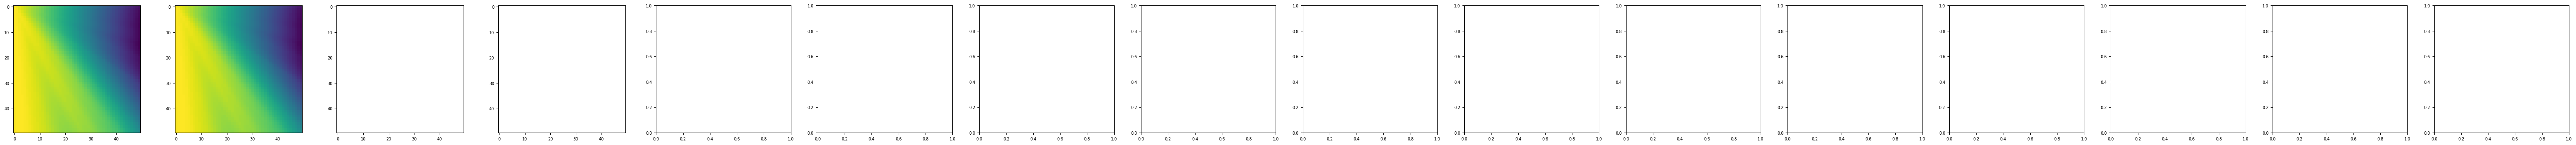

In [108]:
draw_q_functions()